## Import

In [1]:
import pandas as pd
from utils import import_df
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE, ADASYN
import matplotlib.pyplot as plt
from utils import export_df

df = import_df("1-data-cleaning-output.json")
df.head()

,s_00,s_01,s_02,s_03,s_04,s_05,s_06,s_07,s_08,s_09,...,vib_y_f3,vib_y_kurt,vib_y_peak,vib_y_vel,vib_z_acc,vib_z_kurt,vib_z_peak,vib_z_vel,current,label
3050,-0.068780,-4.477798,-6.905241,-4.547951,-2.283589,-0.124857,-1.274090,-0.499428,-1.128634,-0.117876,...,1.760176,0.521458,0.685517,2.844896,1.684042,0.362336,0.576215,2.100146,3.967956,working-engine-1
3051,0.368391,-5.471160,-5.840925,-3.531701,-1.571756,-1.326505,-1.415999,0.166629,-0.261158,-0.461204,...,0.506051,0.530757,0.740439,2.838546,1.700080,0.352717,0.611753,2.122022,3.950103,working-engine-1
3052,0.063973,-5.670291,-6.273518,-3.701076,-2.121080,-0.683337,-1.354200,-0.224765,-0.041428,-0.458915,...,1.760176,0.520424,0.724166,2.835371,1.668003,0.353037,0.573677,2.068546,3.950103,working-engine-1
3053,-0.116846,-5.862554,-6.252918,-3.568322,-2.457542,-0.948844,-0.878119,-0.618448,0.189746,0.184253,...,0.242024,0.523180,0.756713,2.863947,1.684042,0.358809,0.581292,2.100146,3.960632,working-engine-1
3056,-0.380064,-5.342985,-6.486381,-3.854429,-2.130236,-1.038109,-0.688144,0.228428,-0.586175,-0.323873,...,1.683168,0.518702,0.752644,2.848071,1.684042,0.353679,0.596522,2.102577,3.961089,working-engine-1


## Data genaration

In [2]:
for label in df.label.unique():
    print(len(df[df.label == label]))
df_base = df.copy()

782
321
1220
287
3821
3975
1146
1147


In [3]:
X = df.drop(["label"], axis=1)
y = df.label
X_resampled, y_resampled = SMOTE().fit_resample(X, y)
X_resampled

,s_00,s_01,s_02,s_03,s_04,s_05,s_06,s_07,s_08,s_09,...,vib_y_f2,vib_y_f3,vib_y_kurt,vib_y_peak,vib_y_vel,vib_z_acc,vib_z_kurt,vib_z_peak,vib_z_vel,current
0,-0.068780,-4.477798,-6.905241,-4.547951,-2.283589,-0.124857,-1.274090,-0.499428,-1.128634,-0.117876,...,2.766388,1.760176,0.521458,0.685517,2.844896,1.684042,0.362336,0.576215,2.100146,3.967956
1,0.368391,-5.471160,-5.840925,-3.531701,-1.571756,-1.326505,-1.415999,0.166629,-0.261158,-0.461204,...,0.404274,0.506051,0.530757,0.740439,2.838546,1.700080,0.352717,0.611753,2.122022,3.950103
2,0.063973,-5.670291,-6.273518,-3.701076,-2.121080,-0.683337,-1.354200,-0.224765,-0.041428,-0.458915,...,1.334103,1.760176,0.520424,0.724166,2.835371,1.668003,0.353037,0.573677,2.068546,3.950103
3,-0.116846,-5.862554,-6.252918,-3.568322,-2.457542,-0.948844,-0.878119,-0.618448,0.189746,0.184253,...,0.415824,0.242024,0.523180,0.756713,2.863947,1.684042,0.358809,0.581292,2.100146,3.960632
4,-0.380064,-5.342985,-6.486381,-3.854429,-2.130236,-1.038109,-0.688144,0.228428,-0.586175,-0.323873,...,1.749928,1.683168,0.518702,0.752644,2.848071,1.684042,0.353679,0.596522,2.102577,3.961089
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31795,0.580068,2.188554,0.679953,-0.522939,-0.533190,0.339840,0.622341,-0.257775,0.493568,-0.480809,...,0.539475,0.826170,1.001442,1.019799,1.109308,0.996471,1.004388,1.019314,1.167767,3.938747
31796,0.061668,3.011355,0.853147,-0.164021,-0.020543,-0.592657,0.367713,-0.329754,-0.064930,-0.259570,...,0.388255,0.533500,1.009292,1.001777,1.039160,1.017857,0.944582,0.886866,1.146581,3.939537
31797,-0.030359,2.044904,0.861929,-0.768672,0.164520,0.148981,-0.019003,-0.045168,-0.612308,-0.229635,...,1.553824,1.196065,0.968148,0.924510,1.046756,1.017857,1.020822,1.027063,1.173927,3.946964
31798,-0.199270,2.302485,0.328978,-0.529078,0.071339,0.144841,0.110905,-0.199757,0.393857,0.123578,...,0.429918,0.252852,1.016121,1.064724,1.016276,0.994626,0.987197,0.994516,1.166936,3.943306


In [4]:
df = X_resampled
df["label"] = y_resampled

In [5]:
for label in X_resampled.label.unique():
    print(len(df[df.label == label]))

3975
3975
3975
3975
3975
3975
3975
3975


## Export

In [6]:
export_df(df, "2-data-generation-output.json")

## Visualize

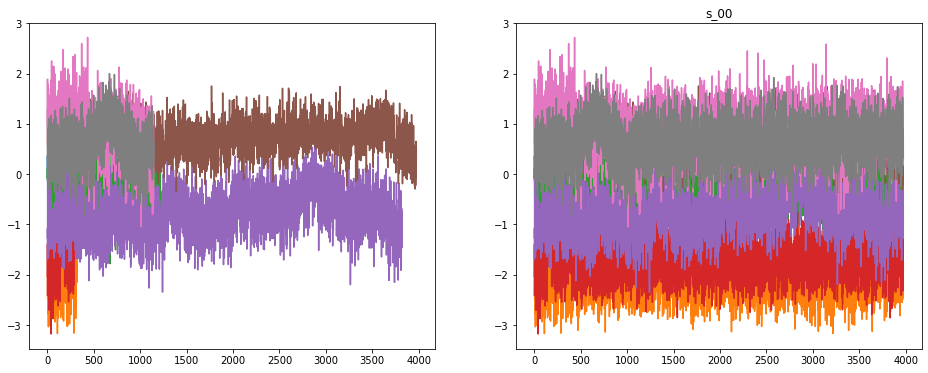

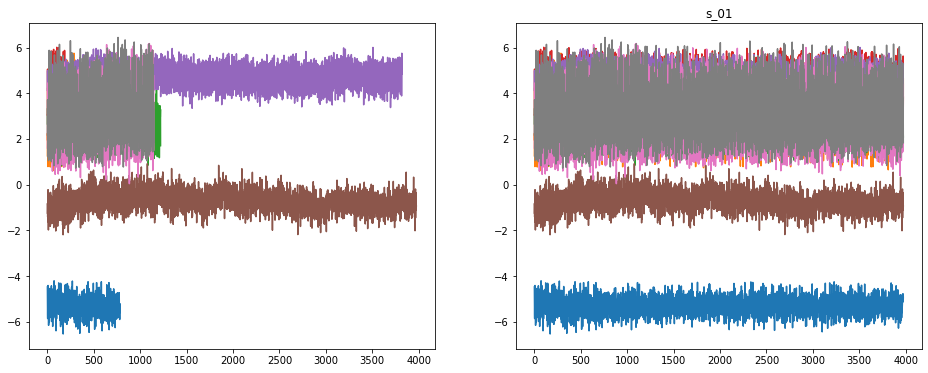

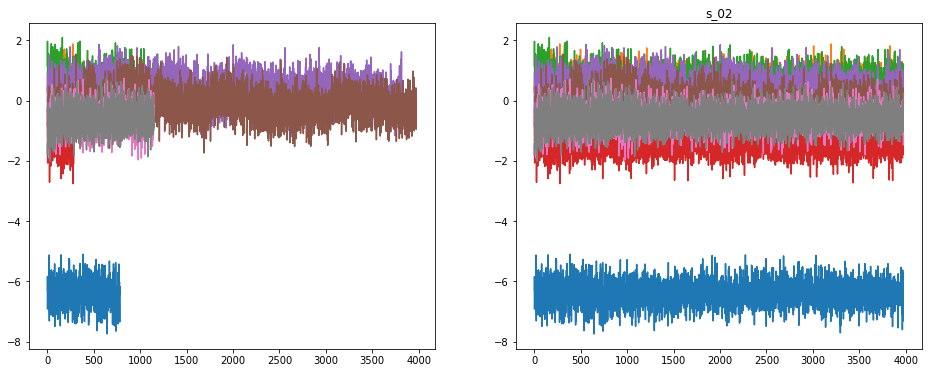

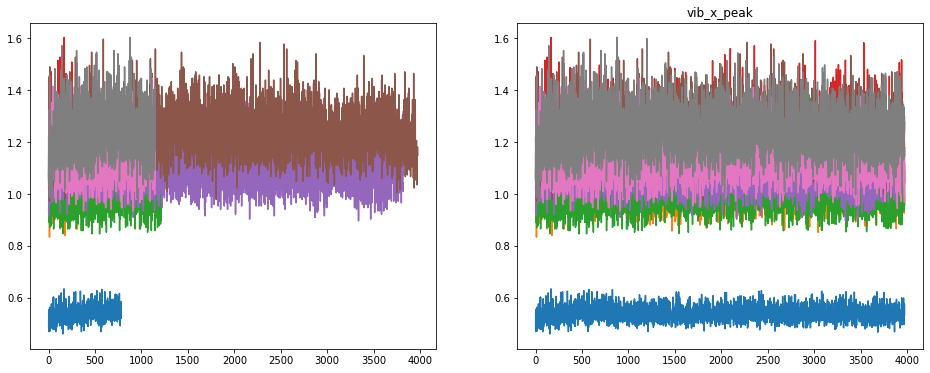

In [7]:
for col in ['s_00', 's_01', 's_02', 'vib_x_peak']:
    fig, (ax1, ax2) = plt.subplots(1,2)
    for label in df.label.unique():
        dff = df[df.label == label][col].reset_index()
        ax2.plot(dff[col], label=label)
        dff = df_base[df_base.label == label][col].reset_index()
        ax1.plot(dff[col], label=label)
    fig.set_size_inches(16, 6)
    plt.title(col)
    plt.show()

## Data visulization using dimensionality reduction

In [8]:
import umap
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA

df_dr = df.drop(["label"], axis=1)
reducer = PCA()
embedding= reducer.fit_transform(df_dr)
c=[sns.color_palette()[x] for x in pd.factorize(df.label)[0]]

In [9]:
df_dr = df_base.drop(["label"], axis=1)
reducer = PCA()
embedding_base= reducer.fit_transform(df_dr)
c_base=[sns.color_palette()[x] for x in pd.factorize(df_base.label)[0]]

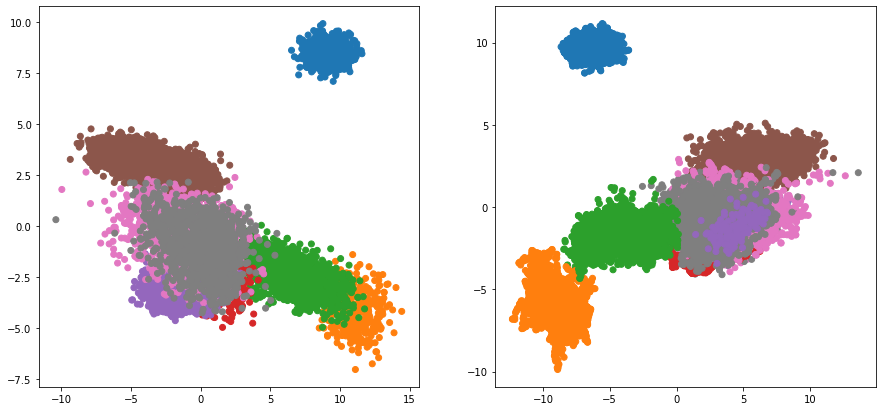

In [10]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 7))
ax1.scatter(embedding_base[:, 0], embedding_base[:, 1], c=c_base)
ax2.scatter(embedding[:, 0], embedding[:, 1], c=c)
plt.show()